# Individuazione hub
In network science, un hub è un nodo all'interno di una rete che ha un alto grado di connettività rispetto agli altri nodi. 
Ovvero, un hub è un nodo che è connesso a molti altri nodi e che gioca un ruolo importante nel trasferimento di informazioni o nella diffusione di influenza all'interno della rete stessa

In [1]:
%matplotlib inline
import networkx as nx
import gzip
import matplotlib.pyplot as plt
G = nx.read_graphml('openflights_world.graphml.gz')

### Densità

La densità della rete si riferisce alla quantità di connessioni presenti nella rete rispetto al numero totale di connessioni possibili tra tutti i nodi della rete.

Se la densità della rete è bassa, significa che solo una piccola percentuale delle connessioni possibili è effettivamente presente nella rete. In altre parole, ci sono molti nodi nella rete che non sono collegati tra di loro.

In [2]:
nx.density(G)

0.0036854903095776227

## Hub

### Trovo il nodo (o i nodi) con grado massimo

In [2]:
high_deg_node = max(G.nodes, key=G.degree)
print(high_deg_node, "grado = ", G.degree(high_deg_node))

AMS grado =  246


#### Il grado però non basta a definire la centralità di un nodo
Il grado di un nodo in un grafo indica semplicemente il numero di archi che incidono su quel nodo, ovvero il numero di connessioni che ha con altri nodi della rete. 
La centralità di un nodo invece è una misura più complessa che tiene conto della posizione del nodo all'interno della rete e del ruolo che esso svolge nella comunicazione tra gli altri nodi.

La betweenness, ad esempio, misura la frequenza con cui un nodo è coinvolto nei percorsi più brevi tra tutti gli altri nodi della rete. 
Quindi un nodo con alta betweenness è un nodo che svolge un ruolo di ponte tra diverse parti della rete e che, se rimosso, potrebbe causare un notevole impatto sulla connettività della rete stessa.

In altre parole, il grado di un nodo può essere utile per capire il numero di connessioni che esso ha con gli altri nodi della rete, ma non tiene conto della posizione e del ruolo del nodo nella rete. 
La betweenness, invece, è una misura più sofisticata che tiene conto anche della posizione del nodo e del suo ruolo nella comunicazione tra gli altri nodi, risultando quindi più efficace per valutare la centralità dei nodi in una rete.

In [3]:
betweenness = nx.centrality.betweenness_centrality(G)
high_betw_mode = max(G.nodes, key= betweenness.get)
print("Beetwenness massima -> ", high_betw_mode, betweenness[high_betw_mode])

Beetwenness massima ->  CDG 0.06470661485997284


In [4]:
print("Grado CDG = ", G.degree("CDG"))

Grado CDG =  239


Un nodo con betweenness pari a 0 significa che non si trova su nessun cammino più breve tra due nodi della rete. 
Al contrario, un nodo con betweenness pari a 1 si trova su tutti i cammini più brevi tra due nodi della rete.

La bassa betweenness dell'aeroporto Charles de Gaulle potrebbe essere normale, poiché potrebbe non essere possibile raggiungere direttamente tutti gli aeroporti del mondo da questo aeroporto. La betweenness dipende dal numero di shortest path che passano attraverso un determinato nodo in una rete, e se non ci sono molti shortest path che passano attraverso l'aeroporto Charles de Gaulle, allora la sua betweenness sarà bassa

Se in una rete il nodo con la massima betweenness ha una betweenness tendente a 0 ma un grado alto, ciò potrebbe indicare che il nodo in questione ha molti collegamenti diretti con altri nodi nella rete, ma questi non sono posizionati in modo tale da fare passare la maggior parte dei cammini più corti attraverso di essi. In altre parole, il nodo potrebbe avere molti vicini, ma questi non sono centrali nella rete. Di conseguenza, nonostante abbia un alto grado, il nodo non è particolarmente centrale nella rete in termini di betweenness.

### Altre statistiche 

Può essere importante verificare il grado medio e mediano della rete

Il grado medio può fornire informazioni sulla densità della rete: se il grado medio è alto, significa che i nodi della rete sono connessi con molti altri nodi, il che indica una rete densa

l grado mediano può fornire informazioni sulla distribuzione dei gradi nella rete: se il grado mediano è alto, significa che molti nodi della rete hanno un alto grado, mentre se il grado mediano è basso, significa che la maggior parte dei nodi ha un basso grado.

In [5]:
degree_sequence = [G.degree(n) for n in G.nodes]
import statistics
print("Grado medio: ", statistics.mean(degree_sequence))
print("Grado mediano: ", statistics.median(degree_sequence))

Grado medio:  11.712488203837685
Grado mediano:  3


Si nota che sia il grado medio che il grado mediano sono estremamente più piccoli rispetto al grado massimo trovato precedentemente (AMS: 246)

Grado medio basso ⇒ rete non densa

Grado mediano basso ⇒ tanti nodi della rete hanno grado basso

Questo vuol dire che ho tanti aeroporti con grado basso e pochi con grado alto o estremamente alto, in più il grado mediano mi dice che, prendendo la lista dei gradi e ordinandola in ordine crescente, al centro ho esattamente grado 3, il che vuol dire che almeno la metà degli aeroporti ha grado ≤ 3

Questi dati possono aiutare a spiegare ulteriormente la betweenness bassa del nodo con maggior betweenness. Infatti, se un aeroporto ha un grado basso significa che ha meno connessioni con altri aeroporti nella rete, il che può limitare le possibilità di raggiungere determinati aeroporti attraverso di esso. Quindi si necessiterà di cammini più lunghi per raggiungere determinati aeroporti

In [6]:
print("Numero di archi: ", G.number_of_edges())
print("Numero di nodi: ", G.number_of_nodes())

Numero di archi:  18617
Numero di nodi:  3179


### Distribuzioni di centralità
Posso riassumere le informazioni sulla centralità di tutti i nodi

In [7]:
betweenness = nx.centrality.betweenness_centrality(G)
betweenness_sequence = list(betweenness.values())

print("Betweenness media: ", statistics.mean(betweenness_sequence))
print("Betweenness mediana: ", statistics.median(betweenness_sequence))

Betweenness media:  0.0009173778947573667
Betweenness mediana:  8.753059219980413e-08


Si nota che entrambe sono molto basse

Questo può indicare che la rete è costituita da diverse comunità o sottoreti che sono relativamente isolate l'una dall'altra e che la comunicazione tra queste comunità può richiedere percorsi più lunghi. In generale, una bassa betweenness non è necessariamente un indicatore negativo della struttura della rete, ma piuttosto suggerisce che la rete ha una struttura diversa rispetto a una rete in cui alcuni nodi hanno una forte centralità di betweenness.

Se i valori di betweenness media e mediana sono molto bassi nella rete, ciò potrebbe indicare che questa è relativamente poco connessa o che la struttura della rete è altamente centralizzata con pochi nodi che sono particolarmente importanti per la connessione degli altri nodi.

### Plot delle distribuzioni

Text(0, 0.5, '# Nodes with that degree')

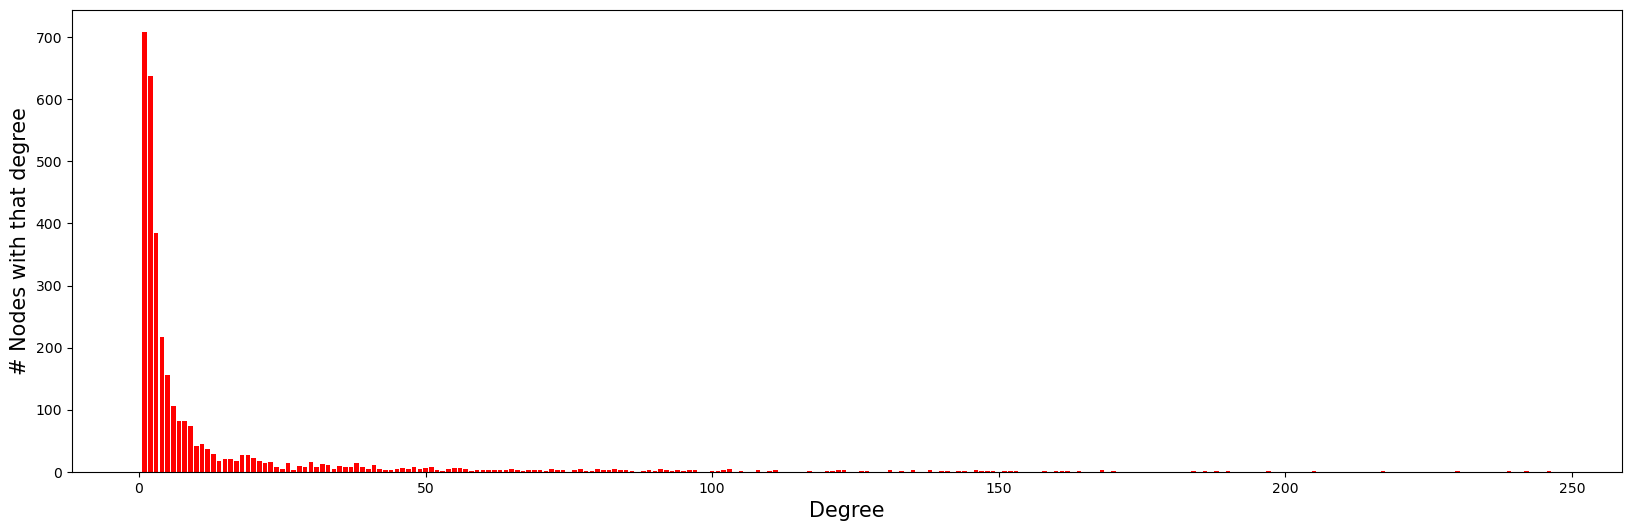

In [8]:
from collections import Counter

degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
fig, ax = plt.subplots(figsize=(20, 6))
plot_x = list(range(min_degree, max_degree + 1))

plot_y = [degree_counts.get(x, 0) for x in plot_x]

plt.bar(plot_x, plot_y, color="red")
plt.xlabel("Degree", fontsize=15)
plt.ylabel("# Nodes with that degree", fontsize=15)

Si nota che ci sono tantissimi nodi con grado estremamente basso e pochissimi nodi con grado medio-alto-estremamente alto

Questa è un’ulteriore conferma delle analisi fatte fino ad ora

Visualizzazione tramite bins

In [9]:
betweenness = nx.centrality.betweenness_centrality(G)
betweenness_sequence = list(betweenness.values())


Text(0, 0.5, '# Nodes with that degree')

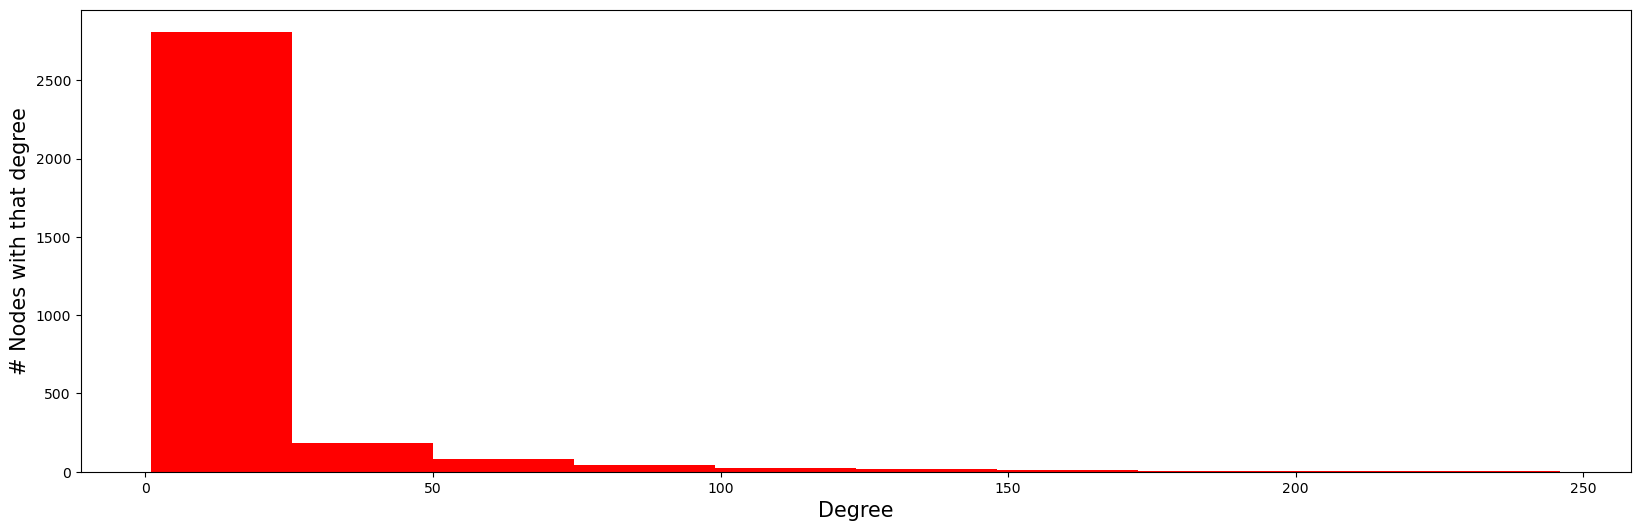

In [10]:
fig, ax = plt.subplots(figsize=(20, 6))
counts, bins, patches = plt.hist(degree_sequence, bins=10, color="red")
plt.xlabel("Degree", fontsize=15)
plt.ylabel("# Nodes with that degree", fontsize=15)

10 bin, ogni bin contiene 25 gradi → si nota come i nodi con grado compreso fra 0 e 25 siano la maggioranza

Text(0, 0.5, '# Nodes with that degree')

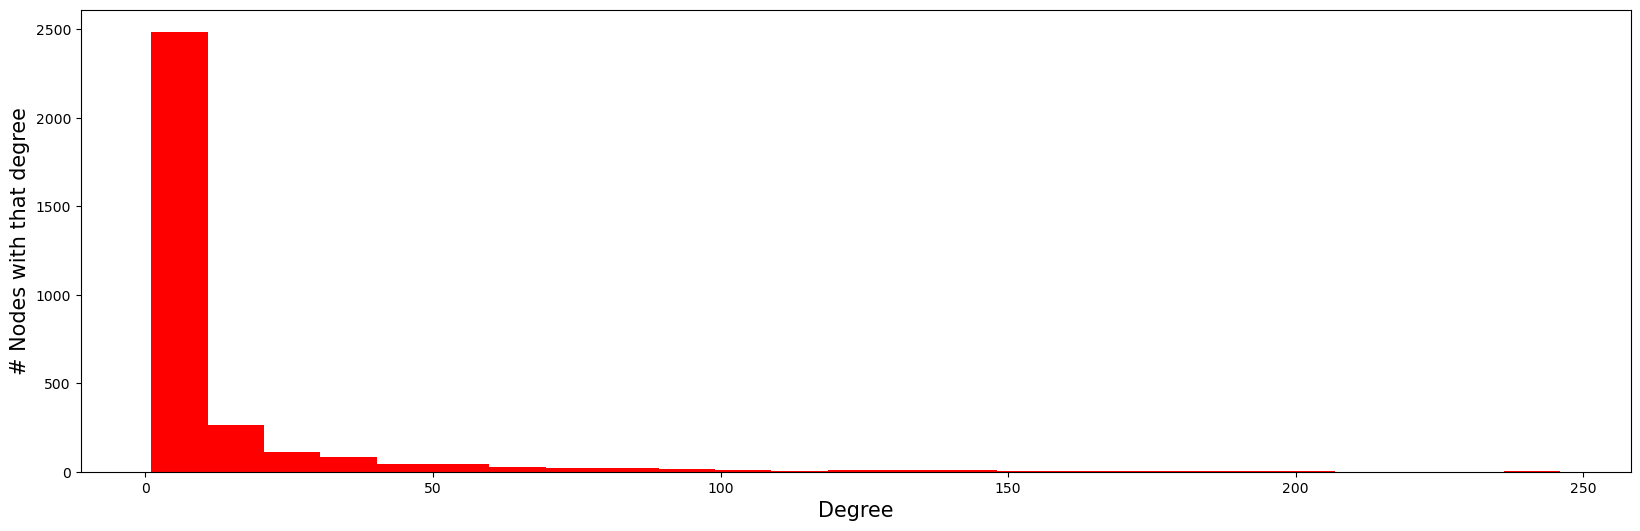

In [11]:
fig, ax = plt.subplots(figsize=(20, 6))
counts, bins, patches = plt.hist(degree_sequence, bins=25, color="red")
plt.xlabel("Degree", fontsize=15)
plt.ylabel("# Nodes with that degree", fontsize=15)

25 bin, ogni bin contiene 10 gradi → si nota come i nodi con grado compreso fra 0 e 10 siano tantissimi rispetto agli altri

### Closeness centrality

Un'altra importante misura di centralità è la closeness centrality

E' una misura di centralità di un nodo in un grafo che quantifica la vicinanza del nodo agli altri nodi del grafo. 
In parole povere, più un nodo è vicino ad altri nodi, più è centrale.

La closeness centrality è più alta (valore = 1) per i nodi che sono più vicini agli altri nodi nel grafo. I nodi con alta closeness centrality sono importanti perché possono diffondere informazioni più rapidamente e raggiungere altri nodi più facilmente rispetto ai nodi con bassa closeness centrality.


In [12]:
centrality = nx.closeness_centrality(G)


In [17]:
high_centr_node = max(G.nodes, key= centrality.get)
print("Max centrality -> ", high_centr_node, centrality[high_centr_node])

Max centrality ->  FRA 0.41090196565991216


Text(0, 0.5, '# Nodes with that centrality')

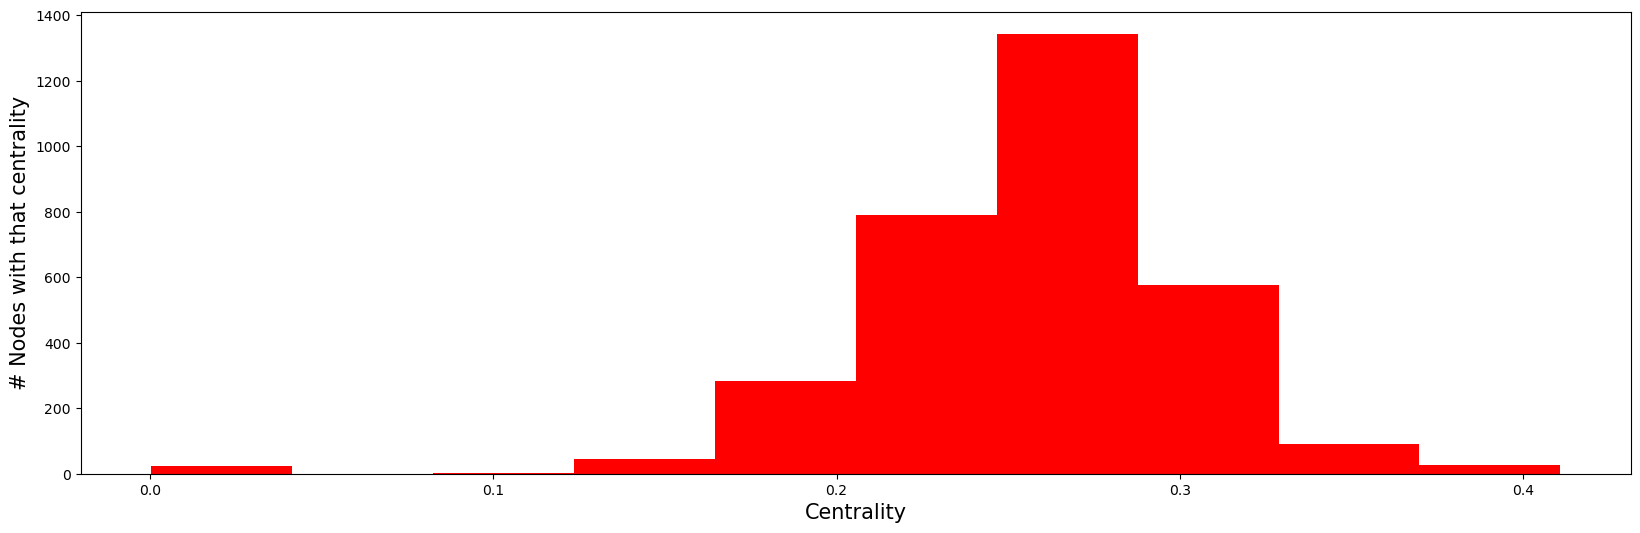

In [22]:
centr_sequence = list(centrality.values())
fig, ax = plt.subplots(figsize=(20, 6))
plt.hist(centr_sequence, color="red")
plt.xlabel("Centrality", fontsize=15)
plt.ylabel("# Nodes with that centrality", fontsize=15)

Statistiche

In [23]:
print("Centralità media: ", statistics.mean(centr_sequence))
print("Centralità mediana: ", statistics.median(centr_sequence))

Centralità media:  0.25540392153632985
Centralità mediana:  0.2588495378211759


Avendo ottenuto un valore medio (e mediano) basso, possiamo dire che i nodi del grafo sono generalmente lontani fra loro, ovvero che la distanza media tra i nodi è relativamente grande